Importing Libraries

In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import copy
import math
%matplotlib inline
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

Loading Data


In [10]:
df = pd.read_excel('heightweightdata.xlsx')
xtrain = df['Height'].values
ytrain = df['Weight'].values

In [11]:
print(df.head())
print(xtrain,ytrain)

   Weight  Height
0      45     120
1      48     123
2      58     135
3      60     145
4      70     160
[120 123 135 145 160] [45 48 58 60 70]


Scattering Data on Graph

Text(0, 0.5, 'Weight')

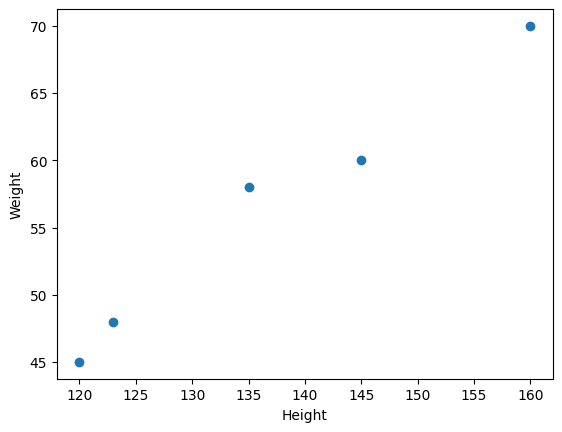

In [12]:
plt.scatter(xtrain,ytrain)
plt.xlabel("Height")
plt.ylabel("Weight")

Independent & Dependent Data

In [13]:
print(xtrain.shape)
print(ytrain.shape)

(5,)
(5,)


Normalizing

In [14]:
xtrain_norm = (xtrain - np.mean(xtrain)) / np.std(xtrain)
ytrain_norm = (ytrain - np.mean(ytrain)) / np.std(ytrain)

Computing Cost


In [15]:
def cost(x, y, w, b): 
    m = x.shape[0]
    total_cost = 0
    for i in range(m):
        total_cost += ((w * x[i] + b) - y[i]) ** 2
    return total_cost/(2*m)

Compute Gradient

In [16]:
def gradient(x, y, w, b): 
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m): 
        dj_db += ((w * x[i] + b) - y[i])
        dj_dw += (((w * x[i] + b) - y[i]) * x[i])
    return dj_dw/m, dj_db/m

Gradient Descent

In [17]:
def gradient_descent(x, y, w_in, b_in, gradient_function, alpha, num_iters): 
    m = len(x)
    w = w_in
    b = b_in
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
    return w, b

In [18]:
w, b = gradient_descent(xtrain_norm, ytrain_norm, 0.2, 0.2, gradient, 0.001, 1500)

# Predict using the learned parameters
m = xtrain.shape[0]
ypred = np.zeros(m)
for i in range(m):
    ypred[i] = w * xtrain_norm[i] + b

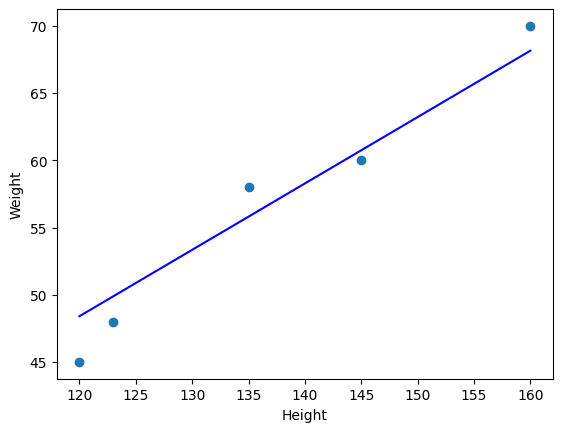

In [19]:
plt.scatter(xtrain, ytrain)
plt.plot(xtrain, ypred * np.std(ytrain) + np.mean(ytrain), c="b")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

Predicting weight for given particular height:

In [20]:
def predict_weight(height):
    height_norm = (height - np.mean(xtrain))/np.std(xtrain)
    weight_norm = w * height_norm + b
    weight = weight_norm * np.std(ytrain) + np.mean(ytrain)
    return weight

Take Input for Height from User:

In [21]:
x = float(input("Enter the height of the person: "))
print(f"The weight of the person with height {x} is {predict_weight(x)}")

The weight of the person with height 182.0 is 79.02054745895609
